## Importing Necessary Dependency & Data Loading 

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import sklearn
from sklearn.metrics import r2_score
import statsmodels


In [35]:

student=pd.read_csv("F:/2024/python/supervised.learning/Linear-Regression/assets/Student_Performance.csv")
student.head(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [36]:
student.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [5]:
### Renaming columns to make them shorter.
student.rename(
    columns={
    "Hours Studied":"x1",
    "Previous Scores":"x2",
    "Extracurricular Activities":"x3",
    "Sleep Hours":"x4",
    "Sample Question Papers Practiced":"x5",
    "Performance Index":"y",
},
inplace=True
)
student.columns

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'y'], dtype='object')

In [6]:
student.size

60000

In [7]:
student.isna().sum()

x1    0
x2    0
x3    0
x4    0
x5    0
y     0
dtype: int64

In [8]:
duplicates=student[student.duplicated()]
print(duplicates) ## There 127 duplicates

      x1  x2   x3  x4  x5     y
915    9  52   No   5   9  48.0
1477   7  61  Yes   6   8  54.0
1601   5  99   No   7   5  89.0
1786   2  62  Yes   9   4  40.0
2026   5  87  Yes   6   7  74.0
...   ..  ..  ...  ..  ..   ...
9644   4  91  Yes   4   3  71.0
9940   8  95   No   5   2  90.0
9954   6  97   No   8   7  92.0
9966   1  41   No   7   3  12.0
9985   8  99   No   5   5  92.0

[127 rows x 6 columns]


In [9]:
### Remove duplicates rows
student.drop_duplicates(inplace=True)
student.size

59238

In [10]:
import sklearn.preprocessing


encode=sklearn.preprocessing.OrdinalEncoder()
encoded_column=encode.fit_transform(student[["x3"]])
print(encoded_column)
student[["x3"]]=encoded_column
student.head(5)

[[1.]
 [0.]
 [1.]
 ...
 [1.]
 [1.]
 [0.]]


,x1,x2,x3,x4,x5,y
0,7,99,1.0,9,1,91.0
1,4,82,0.0,4,2,65.0
2,8,51,1.0,7,2,45.0
3,5,52,1.0,5,2,36.0
4,7,75,0.0,8,5,66.0


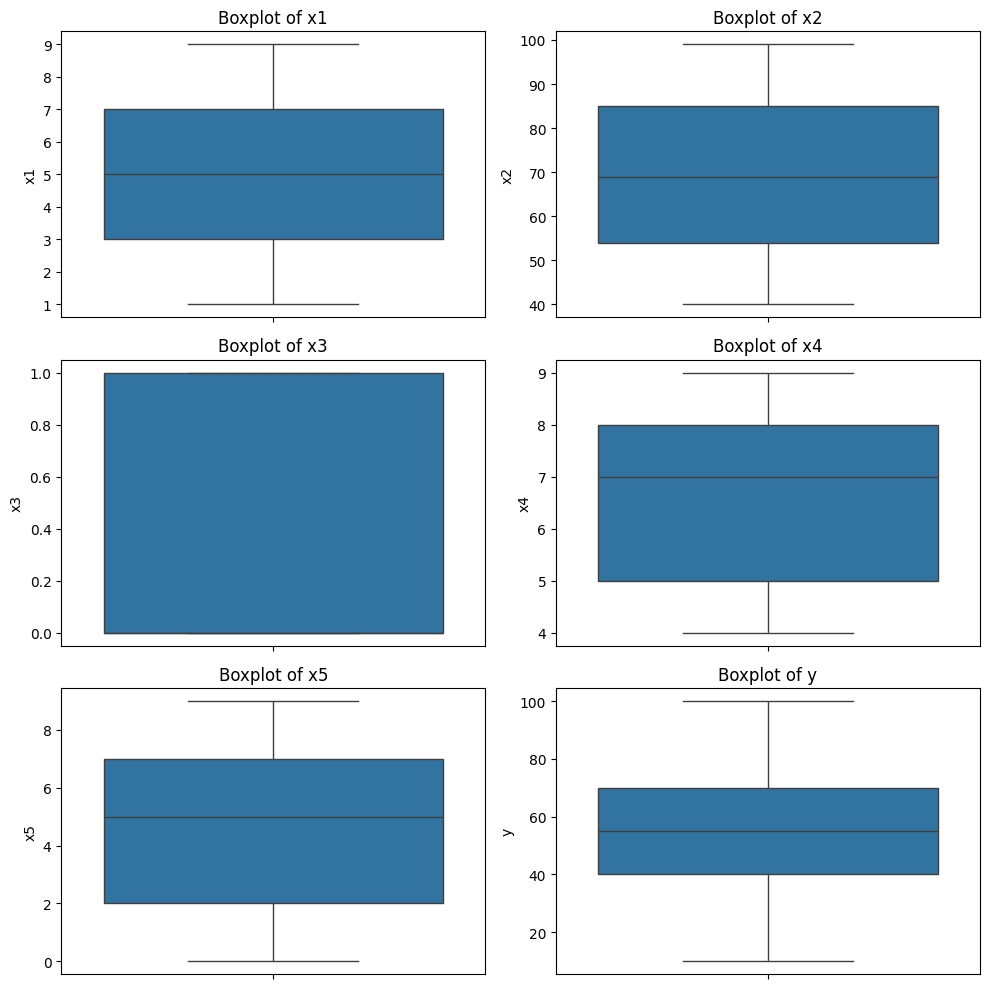

Our diagram suggests that there are no outliers in the student dataset.


In [11]:
# Create boxplots to check for outliers
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))

axes = axes.flatten()

for i, column in enumerate(student.columns):
    sns.boxplot(y=student[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

# Remove any unused axes
if len(student.columns) < len(axes):
    fig.delaxes(axes[len(student.columns)])

plt.tight_layout()
plt.show()

# Conclusion about outliers
print("Our diagram suggests that there are no outliers in the student dataset.")

### Checking if Linear Regression Assumptions are met

In [12]:
## Auto Correlation
correlation=student.corr()
correlation

,x1,x2,x3,x4,x5,y
x1,1.000000,-0.010676,0.004899,0.002131,0.015740,0.375332
x2,-0.010676,1.000000,0.009534,0.007975,0.008719,0.915135
x3,0.004899,0.009534,1.000000,-0.024008,0.013839,0.026075
x4,0.002131,0.007975,-0.024008,1.000000,0.004907,0.050352
x5,0.015740,0.008719,0.013839,0.004907,1.000000,0.043436
y,0.375332,0.915135,0.026075,0.050352,0.043436,1.000000


<Axes: >

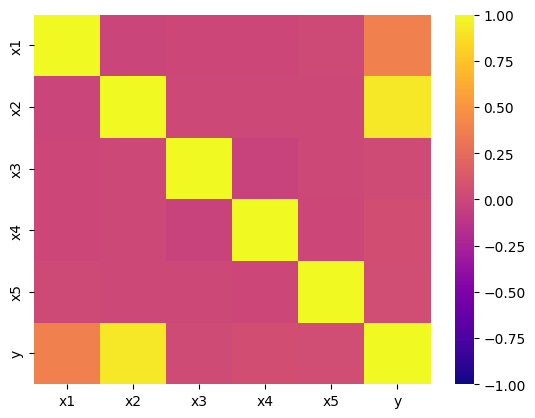

In [13]:
sns.heatmap(correlation,vmax=1,vmin=-1,cmap="plasma")

In [14]:
X=student.iloc[:,:-1].values
y=student.iloc[:,-1].values
y

array([91., 65., 45., ..., 74., 95., 64.])

In [15]:
import sklearn.model_selection


X_train,X_test,y_train,y_test=sklearn.model_selection.train_test_split(X,y,test_size=0.3,shuffle=True)

In [16]:
import sklearn.linear_model
## Evaluate model using R2

Lr=sklearn.linear_model.LinearRegression().fit(X_train,y_train)
Lr.score(X_train,y_train)

0.9888322808556553

In [17]:
print("y_intercept passes through",Lr.intercept_)
print("Coefficient of X are: ",Lr.coef_)

y_intercept passes through -34.05669111609012
Coefficient of X are:  [2.85087109 1.01815831 0.6466984  0.47331313 0.19788085]


In [21]:
###Predict the values of y when we have x's
y_pred = Lr.predict(X_test)
print(y_pred)

[64.97784108 79.32089751 40.15184577 ... 49.56050233 27.22555795
 42.69038683]


In [22]:
pd.DataFrame({
    "Actual values(y_test)":y_test, 
    "Predicted values":y_pred})
## The dataframe compares actual values of the dataset to the predicted values 

,Actual values(y_test),Predicted values
0,69.0,64.977841
1,79.0,79.320898
2,43.0,40.151846
3,35.0,38.432589
4,74.0,74.175586
...,...,...
2957,52.0,48.955553
2958,38.0,36.156764
2959,50.0,49.560502
2960,26.0,27.225558


In [23]:
test_R2=r2_score(y_test,y_pred)
test_R2

0.9883138334409128

### Hypothesis Testing

In [24]:

model = sm.OLS(y_train, X_train).fit()

print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          1.367e+05
Date:                Fri, 01 Nov 2024   Prob (F-statistic):                        0.00
Time:                        10:06:34   Log-Likelihood:                         -21998.
No. Observations:                6911   AIC:                                  4.401e+04
Df Residuals:                    6906   BIC:                                  4.404e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### Interpretation
- From the R² we can say that 99% of the variance in the dependent variable y is explained by the independent variables x₁ to x₅. This shows a strong fit for our model.
- Adjusted R² is also high, similar to R² at 99%, indicating better fitting with respect to the predictors (x_vars).
- All the independent variables are highly significant to the model. This is shown by their p-values. Each one of them has a p-value less than 0.05.
- The Durbin-Watson test has a value closer to 2 (1.973), indicating there is no autocorrelation between the residuals.
    - More info on Durbin-Watson visit [Understanding Durbin-Watson Test](https://medium.com/@analyttica/durbin-watson-test-fde429f79203)
- Skewness is closer to 0(0.004) indicating that the residuals are almost symmetrical
    - Visit [Skew](https://www.investopedia.com/terms/s/skewness.asp#toc-what-is-skewness) for more info on Skewness
- Kurtosis closer to 3 indicating normal distribution
    - Visit [Kurtosis](https://www.investopedia.com/terms/k/kurtosis.asp) for more info on Kurtosis

#### Note: Values might be different due to multiple rerunning of the model

Visualisation

In [25]:
residuals=model.resid
residuals

array([-7.74795968,  1.89884957,  4.20984682, ...,  7.94094905,
       -0.13246728, -7.7524192 ])

Durbin-Watson Statistic: 1.9307392000079882


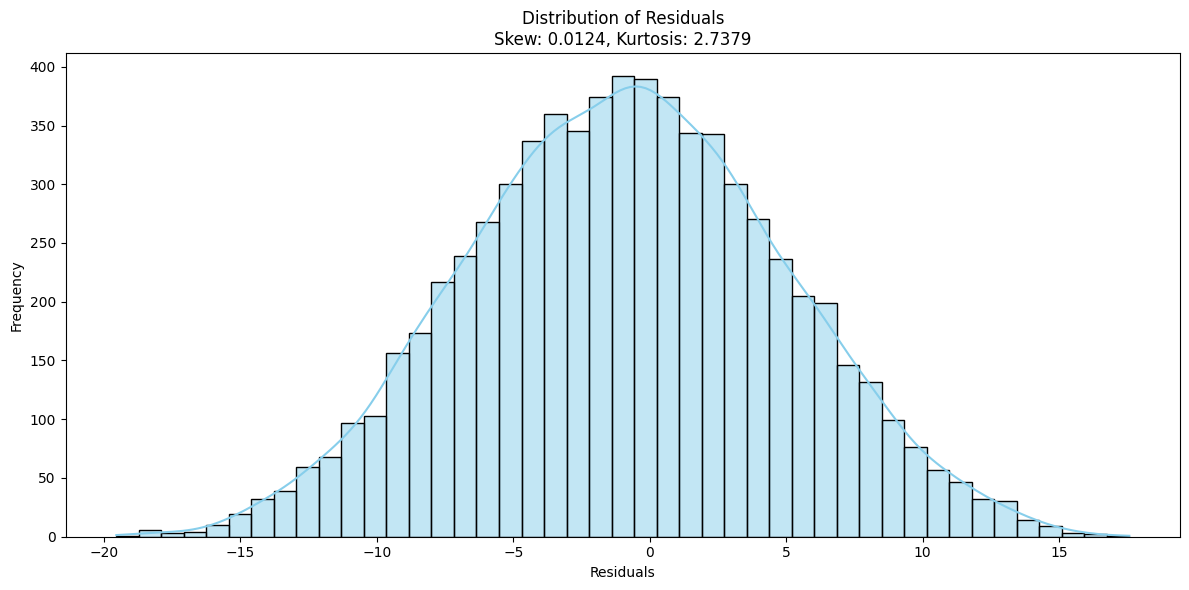

In [27]:
from scipy.stats import skew, kurtosis

durbin_watson_stat = sm.stats.stattools.durbin_watson(residuals)
print(f'Durbin-Watson Statistic: {durbin_watson_stat}')

# Create subplots for residuals histogram and Q-Q plot
plt.figure(figsize=(12, 6))

sns.histplot(residuals, kde=True, color='skyblue')
plt.title(f'Distribution of Residuals\nSkew: {skew(residuals):.4f}, Kurtosis: {kurtosis(residuals, fisher=False):.4f}')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### The graph shows that the residuals are normally distributed


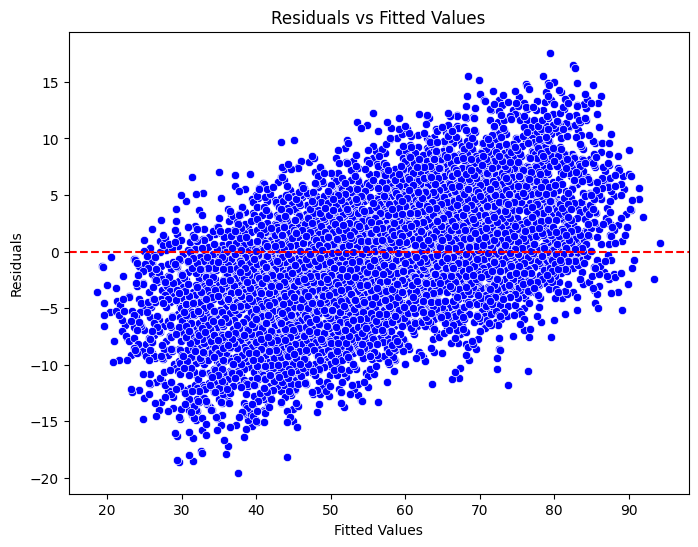

In [28]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=model.fittedvalues, y=residuals, color='blue')

plt.axhline(y=0, color='red', linestyle='--')


plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')


plt.show()


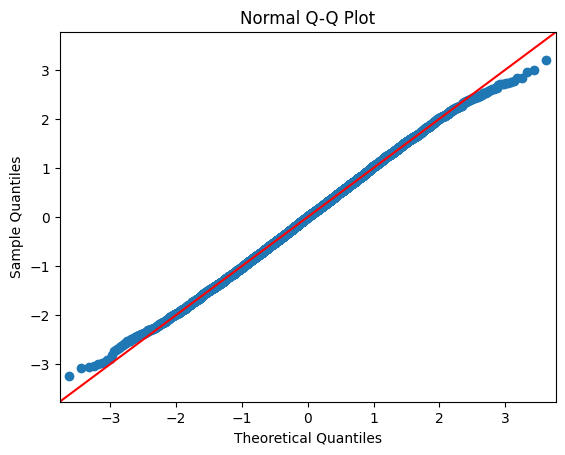

In [29]:
sm.qqplot(residuals, line='45', fit=True)


plt.title('Normal Q-Q Plot')

plt.show()


In [30]:
from joblib import dump

# Save the model to a file
dump(model, 'Student_performance.joblib')

['Student_performance.joblib']